In [1]:
import numpy as np
import pandas as pd

import tensorflow as tf
print(tf.__version__)

import tensorflow.keras as keras
print(keras.__version__)

2.4.3
2.4.0


In [20]:
pwd

'/home/wsuser/work'

In [2]:
!pip install keras==2.2.4

     |████████████████████████████████| 312 kB 26.5 MB/s eta 0:00:01
     |████████████████████████████████| 50 kB 10.9 MB/s eta 0:00:01


In [3]:
!pip install tensorflow

     |████████████████████████████████| 3.8 MB 24.2 MB/s eta 0:00:01
     |████████████████████████████████| 65 kB 6.6 MB/s  eta 0:00:01
  Attempting uninstall: grpcio
    Found existing installation: grpcio 1.35.0
    Uninstalling grpcio-1.35.0:
      Successfully uninstalled grpcio-1.35.0
  Attempting uninstall: opt-einsum
    Found existing installation: opt-einsum 3.1.0
    Uninstalling opt-einsum-3.1.0:
      Successfully uninstalled opt-einsum-3.1.0
  Attempting uninstall: flatbuffers
    Found existing installation: flatbuffers 20210226132247
    Uninstalling flatbuffers-20210226132247:
      Successfully uninstalled flatbuffers-20210226132247


In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Convolution2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from keras.preprocessing.image import ImageDataGenerator

In [5]:
train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2,zoom_range=0.2,horizontal_flip=True)
test_datagen= ImageDataGenerator(rescale=1./255)

In [6]:

import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.

if os.environ.get('RUNTIME_ENV_LOCATION_TYPE') == 'external':
    endpoint_9c0c9c825da34647abc2f28987fd865a = 'https://s3.us.cloud-object-storage.appdomain.cloud'
else:
    endpoint_9c0c9c825da34647abc2f28987fd865a = 'https://s3.private.us.cloud-object-storage.appdomain.cloud'

client_9c0c9c825da34647abc2f28987fd865a = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='1YLKwSYH234SkKTJzSsateLj3_fly9dETgPUSK8IfBaX',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url=endpoint_9c0c9c825da34647abc2f28987fd865a)

streaming_body_3 = client_9c0c9c825da34647abc2f28987fd865a.get_object(Bucket='breastcancerpredictionlogu-donotdelete-pr-hvbomem9kvwt1s', Key='BreastCancer_Dataset_Small.zip')['Body']

# Your data file was loaded into a botocore.response.StreamingBody object.
# Please read the documentation of ibm_boto3 and pandas to learn more about the possibilities to load the data.
# ibm_boto3 documentation: https://ibm.github.io/ibm-cos-sdk-python/
# pandas documentation: http://pandas.pydata.org/


In [7]:
from io import BytesIO
import zipfile
unzip = zipfile.ZipFile(BytesIO(streaming_body_3.read()),'r')
file_paths=unzip.namelist()
for path in file_paths:
    unzip.extract(path)

In [8]:
ls-1

BreastCancer_Dataset_Small/


In [9]:
import os
filenames=os.listdir('/home/wsuser/work/BreastCancer_Dataset_Small/Train')

In [10]:
x_train=train_datagen.flow_from_directory(r"/home/wsuser/work/BreastCancer_Dataset_Small/Train", target_size=(128,128), batch_size=32, class_mode="categorical")

Found 16178 images belonging to 2 classes.


In [11]:
x_test=test_datagen.flow_from_directory(r"/home/wsuser/work/BreastCancer_Dataset_Small/Test", target_size=(128,128), batch_size=32, class_mode="categorical")

Found 3488 images belonging to 2 classes.


In [12]:
model=Sequential()

In [13]:
model.add(Convolution2D(32,(5,5),input_shape=(128,128,3),activation="relu"))

In [14]:
#add maxpooling layer
model.add(MaxPooling2D(2,2))

In [15]:
#add flatten layer
model.add(Flatten())

In [16]:
#add hidden layer
model.add(Dense(units=128,activation="relu"))

In [17]:
#add output layer
model.add(Dense(units=2, activation="softmax"))

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 124, 124, 32)      2432      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 62, 62, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 123008)            0         
_________________________________________________________________
dense (Dense)                (None, 128)               15745152  
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 258       
Total params: 15,747,842
Trainable params: 15,747,842
Non-trainable params: 0
_________________________________________________________________


In [19]:
#configure the learning process
model.compile(loss="categorical_crossentropy", optimizer="adam",metrics=["accuracy"])

In [20]:
#fit the model
# steps_per_epoch=no.of images in train data/batch_size
#16178/32=506
# validation steps=no.of images in test data/batch _size
#3488/32=109
model.fit(x_train,steps_per_epoch= 506, epochs=30, validation_data=x_test,validation_steps=109 )

Epoch 1/30
506/506 [==============================] - 252s 498ms/step - loss: 1.0174 - accuracy: 0.7188 - val_loss: 0.3328 - val_accuracy: 0.8558
Epoch 2/30
506/506 [==============================] - 251s 495ms/step - loss: 0.4915 - accuracy: 0.7781 - val_loss: 0.6158 - val_accuracy: 0.5000
Epoch 3/30
506/506 [==============================] - 244s 482ms/step - loss: 0.6088 - accuracy: 0.6894 - val_loss: 0.3380 - val_accuracy: 0.8549
Epoch 4/30
506/506 [==============================] - 252s 498ms/step - loss: 0.4369 - accuracy: 0.8083 - val_loss: 0.3123 - val_accuracy: 0.8739
Epoch 5/30
506/506 [==============================] - 251s 495ms/step - loss: 0.3973 - accuracy: 0.8326 - val_loss: 0.3603 - val_accuracy: 0.8538
Epoch 6/30
506/506 [==============================] - 249s 492ms/step - loss: 0.3980 - accuracy: 0.8256 - val_loss: 0.3220 - val_accuracy: 0.8601
Epoch 7/30
506/506 [==============================] - 234s 462ms/step - loss: 0.3829 - accuracy: 0.8386 - val_loss: 0.3343 -

In [21]:
model.save("Breast_Cancer_CNN_Model_Small.h5")

In [22]:
!tar -zcvf Breast_Cancer_CNN_Model_Small.tgz Breast_Cancer_CNN_Model_Small.h5

Breast_Cancer_CNN_Model_Small.h5


In [23]:
ls

Breast_Cancer_CNN_Model_Small.h5   BreastCancer_Dataset_Small/
Breast_Cancer_CNN_Model_Small.tgz


In [41]:
!pip install watson-machine-learning-client --upgrade

     |████████████████████████████████| 538 kB 22.6 MB/s eta 0:00:01


In [24]:

from ibm_watson_machine_learning import APIClient
wml_credentials = { "url": "https://us-south.ml.cloud.ibm.com",
                  "apikey": "JHO6rBiA8a_BOg-j0meLSIoRdy7nnI62ooaoqxGaPfWo"
                  }
client = APIClient(wml_credentials)


In [25]:
def guide_from_space_name(client,space_name):
    space = client.spaces.get_details()
    return(next(item for item in space['resources']if item['entity']["name"]== space_name)['metadata']['id'])

In [26]:
space_uid = guide_from_space_name(client,'CNN_Breast_Cancer_Prediction')
print("Space UID = " + space_uid)

Space UID = 6fc03aad-f065-44cf-b79b-1125233a2316


In [27]:
client.set.default_space(space_uid)

'SUCCESS'

In [28]:
client.software_specifications.list()

-----------------------------  ------------------------------------  ----
NAME                           ASSET_ID                              TYPE
default_py3.6                  0062b8c9-8b7d-44a0-a9b9-46c416adcbd9  base
pytorch-onnx_1.3-py3.7-edt     069ea134-3346-5748-b513-49120e15d288  base
scikit-learn_0.20-py3.6        09c5a1d0-9c1e-4473-a344-eb7b665ff687  base
spark-mllib_3.0-scala_2.12     09f4cff0-90a7-5899-b9ed-1ef348aebdee  base
ai-function_0.1-py3.6          0cdb0f1e-5376-4f4d-92dd-da3b69aa9bda  base
shiny-r3.6                     0e6e79df-875e-4f24-8ae9-62dcc2148306  base
tensorflow_2.4-py3.7-horovod   1092590a-307d-563d-9b62-4eb7d64b3f22  base
pytorch_1.1-py3.6              10ac12d6-6b30-4ccd-8392-3e922c096a92  base
tensorflow_1.15-py3.6-ddl      111e41b3-de2d-5422-a4d6-bf776828c4b7  base
scikit-learn_0.22-py3.6        154010fa-5b3b-4ac1-82af-4d5ee5abbc85  base
default_r3.6                   1b70aec3-ab34-4b87-8aa0-a4a3c8296a36  base
pytorch-onnx_1.3-py3.6         1bc6029

'2b73a275-7cbf-420b-a912-eae7f436e0bc'

In [47]:
!pip install watson-machine-learning-client

In [29]:
software_spec_uid = client.software_specifications.get_uid_by_name("tensorflow_1.15-py3.6")
software_spec_uid

'2b73a275-7cbf-420b-a912-eae7f436e0bc'

In [30]:
model_details = client.repository.store_model(model='Breast_Cancer_CNN_Model_Small.tgz',meta_props= {
client.repository.ModelMetaNames.NAME:"CNN",
client.repository.ModelMetaNames.TYPE:"keras_2.2.4",
client.repository.ModelMetaNames.SOFTWARE_SPEC_UID:software_spec_uid}) 
model_id = client.repository.get_model_uid(model_details)

Note: Warnings!! :  Model type keras_2.2.4 is deprecated. We recommend you use a supported model type. See Supported Frameworks https://dataplatform.cloud.ibm.com/docs/content/wsj/analyze-data/pm_service_supported_frameworks.html


In [96]:
model_id

'd5cf8374-00ff-4545-b8d6-a1571230cb80'

In [31]:
from keras.preprocessing import image
from tensorflow.keras.models import load_model

In [32]:
client.repository.download(model_id,'my_model.tar.gz')

Successfully saved model content to file: 'my_model.tar.gz'


'/home/wsuser/work/my_model.tar.gz'

In [33]:
model=load_model("Breast_Cancer_CNN_Model_Small.h5")

In [39]:

streaming_body_7 = client_9c0c9c825da34647abc2f28987fd865a.get_object(Bucket='breastcancerpredictionlogu-donotdelete-pr-hvbomem9kvwt1s', Key='9023_idx5_x1301_y1401_class1.png')['Body']

# Your data file was loaded into a botocore.response.StreamingBody object.
# Please read the documentation of ibm_boto3 and pandas to learn more about the possibilities to load the data.
# ibm_boto3 documentation: https://ibm.github.io/ibm-cos-sdk-python/
# pandas documentation: http://pandas.pydata.org/
# Your data file was loaded into a botocore.response.StreamingBody object.
# Please read the documentation of ibm_boto3 and pandas to learn more about the possibilities to load the data.
# ibm_boto3 documentation: https://ibm.github.io/ibm-cos-sdk-python/
# pandas documentation: http://pandas.pydata.org/
if not hasattr (streaming_body_7, "__iter__"): streaming_body_7.__iter__ = types.MethodType(__iter__, streaming_body_7)

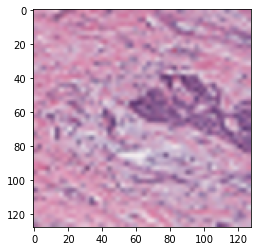

In [40]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

imgo = Image.open(streaming_body_7)
newsize = (128, 128)
im1 = imgo.resize(newsize)
im_array = np.asarray(im1)

plt.imshow(im_array)
plt.show()

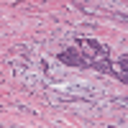

In [41]:
im1

In [42]:

x=image.img_to_array(im1)

x = np.expand_dims(x,axis = 0)

y=model.predict(x)

pred= np.argmax(y, axis=1)

pred

index=['Breast Cancer Negative','Breast Cancer Positive']

a = index[pred[0]]
print(a)

Breast Cancer Positive
